<a href="https://colab.research.google.com/github/Himanshu-sharmaonline/Hands-On-work/blob/main/Kaggle/Titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 ! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"himanshukumarsharma","key":"fa5ee604878d59cd89053ba9b5d7643e"}'}

In [3]:
 ! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
 ! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              215KB  2021-03-14 09:17:01            374  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27            395  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-02-17 16:10:44            325  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19            150  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [7]:
! kaggle competitions download -c titanic

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 24.3MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 48.3MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.68MB/s]


In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [218]:
train_file=pd.read_csv(r'/content/train.csv')
train_file_final =pd.read_csv(r'/content/train.csv')

In [219]:
train_file.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [220]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [221]:
train_file.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [222]:
train_file.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [223]:
#drop Cabin column lots of blank rows in the columns and name columns not useful.
#Drop the Embarked rows which are blank as they are blank and it's Dtype of Object, can't fill anything in that.
train_file.drop(columns=["Cabin","Name","Ticket"],inplace=True)
train_file.dropna(axis=0, subset=["Embarked"],inplace=True)

In [224]:
train_file["Pclass"].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

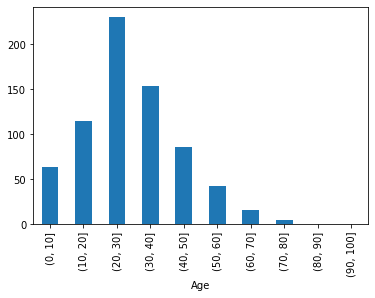

In [225]:
train_file["Age"].groupby(pd.cut(train_file["Age"], np.arange(0, 100+10, 10))).count().plot.bar()
#so in Titanic mostly the age group people were from [20-40] 

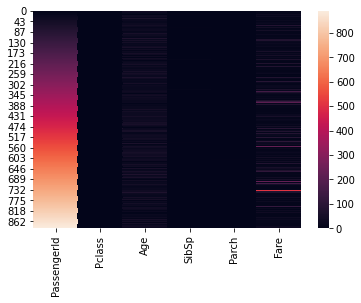

In [226]:
sns.heatmap(train_file[["PassengerId","Pclass","Age","SibSp","Parch","Fare"]])

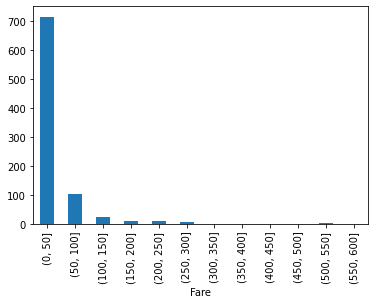

In [227]:
train_file["Fare"].groupby(pd.cut(train_file["Fare"],np.arange(0,600+50,50))).count().plot.bar()

In [228]:
#fare needed to be normalized, Age nan values should be filled and catogerical values should be converted.
#1. Filling the NAN in Age column with mean value.
train_file["Age"]=train_file["Age"].fillna(train_file["Age"].mean())
Age_mean=train_file["Age"].mean() #29.64209269662921  will use while testing if test_data contains null
Age_std =train_file["Age"].std()  #12.968346294351784
train_file["Age"]=(train_file["Age"]-train_file["Age"].mean())/train_file["Age"].std()

In [229]:
train_file["Age"].mean(),train_file["Age"].std(),Age_mean,Age_std

(8.058420822270807e-15,
 0.9999999999999989,
 29.642092696629106,
 12.968346294351784)

In [230]:

#(df-df.mean())/df.std() standard normalization method. Fare
fare_mean=train_file["Fare"].mean()
fare_std=train_file["Fare"].std()
train_file["Fare"]=(train_file["Fare"]-train_file["Fare"].mean())/train_file["Fare"].std()


In [231]:
#Sex is changed
train_file["Sex"]=[1 if i =="male" else 0 for i in train_file['Sex']]

In [232]:
train_file["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [233]:
embarked=pd.get_dummies(train_file["Embarked"])

In [234]:
embarked.shape

(889, 3)

In [235]:
train_file.shape

(889, 9)

In [236]:
train_file=pd.merge(train_file, embarked, left_index=True, right_index=True)

In [237]:
train_file["Pclass"].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [239]:
#scale all the rows needed in one go
train_file_final.drop(columns=["Cabin","Name","Ticket"],inplace=True)
train_file_final.dropna(axis=0, subset=["Embarked"],inplace=True)
train_file_final["Age"]=train_file_final["Age"].fillna(train_file_final["Age"].mean())
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(train_file_final[[	"Pclass","Age",	"SibSp",	"Parch",	"Fare"]]) 


In [240]:
train_file_final[["Pclass","Age",	"SibSp",	"Parch",	"Fare"]]=scaled_values

In [242]:
train_file_final["Sex"]=[1 if i =="male" else 0 for i in train_file_final['Sex']]
embarked=pd.get_dummies(train_file_final["Embarked"])
train_file_final=pd.merge(train_file_final, embarked, left_index=True, right_index=True)

In [244]:
train_file_final.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,0.655793,0.649044,0.367204,0.065523,0.063742,0.062649,0.188976,0.086614,0.724409
std,256.998173,0.486260,0.417350,0.477538,0.162960,0.137963,0.134460,0.097003,0.391710,0.281427,0.447063
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,0.500000,0.000000,0.271174,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000
50%,446.000000,0.000000,1.000000,1.000000,0.367204,0.000000,0.000000,0.028213,0.000000,0.000000,1.000000
75%,668.000000,1.000000,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508,0.000000,0.000000,1.000000
max,891.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [246]:
train_file_final.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
C              0
Q              0
S              0
dtype: int64

In [247]:
train_label=train_file_final[["Survived"]]
train_features=train_file_final[train_file_final.columns[~train_file.columns.isin(["PassengerId","Survived","Embarked"])]]


In [248]:
train_features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,1.0,1,0.271174,0.125,0.0,0.014151,0,0,1
1,0.0,0,0.472229,0.125,0.0,0.139136,1,0,0
2,1.0,0,0.321438,0.000,0.0,0.015469,0,0,1
3,0.0,0,0.434531,0.125,0.0,0.103644,0,0,1
4,1.0,1,0.434531,0.000,0.0,0.015713,0,0,1


In [249]:
train_label.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [250]:
#builting Deep Neural Network
#importing all the necessery Packages
from keras.models import Model, load_model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,Bidirectional
from keras.optimizers import Adam
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import layers
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

In [251]:
input_dim=train_features.shape[1]

In [252]:
model = Sequential()
model.add(layers.Dense(9, input_dim=input_dim, activation='relu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(32, input_dim=input_dim, activation='relu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(64, input_dim=input_dim, activation='relu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(32, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(16, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 90        
_________________________________________________________________
dropout (Dropout)            (None, 9)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2

In [253]:
y_train=train_label

In [254]:
history = model.fit(train_features, y_train,epochs=50, verbose=False, batch_size=10, shuffle = True)

In [255]:
loss, accuracy = model.evaluate(train_features, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))

Training Accuracy: 0.8358


In [264]:
#Testing
test_file=pd.read_csv(r'/content/test.csv')

In [265]:
test_file=test_file[["Pclass",	"Sex",	"Age",	"SibSp",	"Parch",	"Fare","Embarked"]]

In [268]:
test_file.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [267]:
test_file["Age"]=test_file["Age"].fillna(Age_mean)

In [269]:
test_file["Fare"]=test_file["Fare"].fillna(fare_mean)

In [270]:
test_file["Sex"]=[1 if i =="male" else 0 for i in test_file['Sex']]
embarked=pd.get_dummies(test_file["Embarked"])
test_file=pd.merge(test_file, embarked, left_index=True, right_index=True)

In [271]:
scaler_test=scaler.transform(test_file[["Pclass",	"Age",	"SibSp",	"Parch",	"Fare"]])

In [272]:
test_file[["Pclass",	"Age",	"SibSp",	"Parch",	"Fare"]]=scaler_test

In [275]:
test_file=test_file[[	"Pclass",	"Sex","Age",	"SibSp",	"Parch",	"Fare",	"C",	"Q",	"S"]]

In [276]:
pred=model.predict(test_file)

In [278]:
pred[pred>=0.5]=1
pred[pred<0.5]=0

In [280]:
test_file["pred"]=pred

In [285]:
check=pd.read_csv(r'/content/gender_submission.csv')
test_file_check=pd.read_csv(r'/content/test.csv')
test_file_check=test_file_check[['PassengerId']]

In [282]:
check.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [286]:
test_file=pd.merge(test_file, test_file_check, left_index=True, right_index=True)

In [287]:
test_file.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,pred,PassengerId
0,1.0,1,0.428248,0.000,0.000000,0.015282,0,1,0,0.0,892
1,1.0,0,0.585323,0.125,0.000000,0.013663,0,0,1,0.0,893
2,0.5,1,0.773813,0.000,0.000000,0.018909,0,1,0,0.0,894
3,1.0,1,0.334004,0.000,0.000000,0.016908,0,0,1,0.0,895
4,1.0,0,0.271174,0.125,0.166667,0.023984,0,0,1,1.0,896


In [290]:
result=pd.concat([test_file,check],axis=1)

In [292]:
result["pred"]=result["pred"].astype(int)

In [293]:
result

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,pred,PassengerId,PassengerId,Survived
0,1.0,1,0.428248,0.000,0.000000,0.015282,0,1,0,0,892,892,0
1,1.0,0,0.585323,0.125,0.000000,0.013663,0,0,1,0,893,893,1
2,0.5,1,0.773813,0.000,0.000000,0.018909,0,1,0,0,894,894,0
3,1.0,1,0.334004,0.000,0.000000,0.016908,0,0,1,0,895,895,0
4,1.0,0,0.271174,0.125,0.166667,0.023984,0,0,1,1,896,896,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,1,0.367204,0.000,0.000000,0.015713,0,0,1,0,1305,1305,0
414,0.0,0,0.484795,0.000,0.000000,0.212559,1,0,0,1,1306,1306,1
415,1.0,1,0.478512,0.000,0.000000,0.014151,0,0,1,0,1307,1307,0
416,1.0,1,0.367204,0.000,0.000000,0.015713,0,0,1,0,1308,1308,0


In [294]:
from sklearn.metrics import confusion_matrix
confusion_matrix(result["Survived"], result["pred"])

array([[255,  11],
       [ 14, 138]])

In [295]:
(255+138)/(255+138+14+11)

0.9401913875598086

In [296]:
result[result["pred"]!=result["Survived"]]

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S,pred,PassengerId,PassengerId,Survived
1,1.0,0,0.585323,0.125,0.000000,0.013663,0,0,1,0,893,893,1
18,1.0,0,0.334004,0.125,0.000000,0.015469,0,0,1,0,910,910,1
21,1.0,1,0.107816,0.000,0.166667,0.006189,0,0,1,1,913,913,0
32,1.0,0,0.409399,0.125,0.333333,0.040160,0,0,1,0,924,924,1
33,1.0,0,0.367204,0.125,0.333333,0.045771,0,0,1,0,925,925,1
49,1.0,0,0.447097,0.000,0.333333,0.031035,0,0,1,0,941,941,1
64,0.0,1,0.158080,0.250,0.333333,0.512122,1,0,0,1,956,956,0
80,1.0,1,0.070118,0.125,0.166667,0.029758,1,0,0,1,972,972,0
89,0.5,1,0.019854,0.125,0.166667,0.044893,0,0,1,1,981,981,0
132,1.0,0,0.367204,0.000,0.666667,0.049708,0,0,1,0,1024,1024,1
